### Build a LSTM time series model to forecast the Sales_quantity. Use 6 as the number of time periods to forecast the feature. The number of data points in training and test can be your wish.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data

data = pd.read_csv('F:\Skillenable\Data frames\Dharma-Initiative-Sales-Data.csv')
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729,1257.763541,30024676
1,01.02.2015,15807587.45,11636,1358.507000,30024676
2,01.03.2015,22047146.02,15922,1384.697024,30024676
3,01.04.2015,18814583.29,15227,1235.606705,30024676
4,01.05.2015,14021479.61,8620,1626.621765,30024676


In [3]:
df = data[['Period', 'Sales_quantity']]

In [4]:
df.head()

,Period,Sales_quantity
0,01.01.2015,12729
1,01.02.2015,11636
2,01.03.2015,15922
3,01.04.2015,15227
4,01.05.2015,8620


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period          64 non-null     object
 1   Sales_quantity  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# datatime tadatype
df['Period'] = pd.to_datetime(df.Period)


C:\Users\arun\AppData\Local\Temp/ipykernel_5904/3732639959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df.Period)


In [7]:
# indexing
df.set_index('Period', inplace= True)
df.head()

,Sales_quantity
Period,
2015-01-01,12729
2015-01-02,11636
2015-01-03,15922
2015-01-04,15227
2015-01-05,8620


<AxesSubplot:xlabel='Period'>

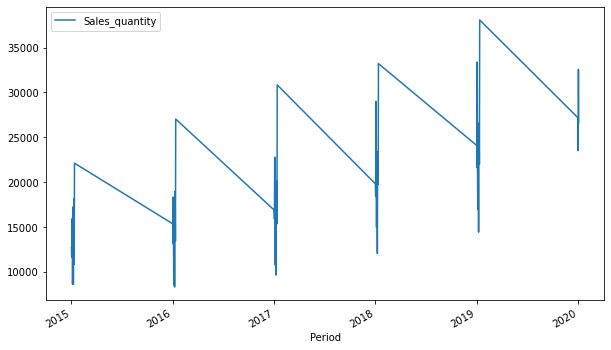

In [8]:
df.plot(figsize= (10,6))   # plotting the data

In [12]:
# saperate the data as train and test
len(data)-10  # taking last 10 data as test data

54

In [14]:
train = df.iloc[:54]
test = df.iloc[54:]

In [15]:
len(train), len(test)

(54, 10)

In [16]:
# NOrmalizing the data
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()  # assigning the object

In [18]:
train_scale = scaler.fit_transform(train) # scaled the data
test_scale = scaler.fit_transform(test)

In [19]:
test_scale

array([[0.31669346],
       [0.        ],
       [0.37321262],
       [0.51493358],
       [0.31965479],
       [1.        ],
       [0.53951265],
       [0.38404264],
       [0.7673238 ],
       [0.51544124]])

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

# We will take 6 values to predict the time series data 

n_input = 6
generator = TimeseriesGenerator(train_scale, train_scale, length = n_input, batch_size = 1)

In [22]:
train_scale[:6]

array([[0.17614203],
       [0.13253541],
       [0.30353082],
       [0.27580291],
       [0.01220826],
       [0.19333732]])

In [27]:
generator[0]    #IT'S OUR FIRST GENERATOR OF FIRST INDEX; give first 12 data

(array([[[0.17614203],
         [0.13253541],
         [0.30353082],
         [0.27580291],
         [0.01220826],
         [0.19333732]]]),
 array([[0.35667265]]))

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Defining the model

rnn = Sequential()

In [24]:
rnn.add(LSTM(units=50, activation = 'relu', input_shape= (n_input, 1))) # adding input layer

In [25]:
# output layer
rnn.add(Dense(units=1)) ## output = 1

In [31]:
# compile model

rnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics='accuracy')

In [32]:
# fitting the model

rnn.fit(generator, epochs=50)

Epoch 1/50
48/48 [==============================] - 1s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 8/50
48/48 [==============================] - 0s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 9/50
48/48 [==============================] - 0s 2ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 10/50
48/48 [==============================] - 0s 3ms/step - loss: 6.3608 - accuracy: 0.0208
Epoch 11/50
48/48 [

In [33]:
test_scale

array([[0.31669346],
       [0.        ],
       [0.37321262],
       [0.51493358],
       [0.31965479],
       [1.        ],
       [0.53951265],
       [0.38404264],
       [0.7673238 ],
       [0.51544124]])

In [36]:
predict_train = train_scale[-6:]  #last 6 val

In [37]:
predict_train = predict_train.reshape(1,n_input,1)

In [38]:
predict_train.shape   #3d data

(1, 6, 1)

In [39]:
rnn.predict(train_scale[-6:])

array([[-0.00347447],
       [-0.00298578],
       [-0.00512383],
       [-0.00311449],
       [-0.0020089 ],
       [-0.00363999]], dtype=float32)

In [40]:
rnn.predict(predict_train)  # prediction of first data after scaling

array([[-0.01327989]], dtype=float32)

In [41]:
test_scale[0]   #here we can see the difference in predicted and real value

array([0.31669346])